# O Assunto é...

## Correlação de palavras entre tweets sobre determinado tópico, para você mandar bem nas conversas.

Queremos determinar quais palavras estão mais correlacionadas entre Tweets sobre determinado assunto, utilizando o pacote **widyr**.

Cleuton Sampaio

In [1]:
library(twitteR)
library(ROAuth)
library(httr)
library(plyr)
library(stringr)
library(tidytext)
library(readr)
library(dplyr)
library(widyr)



Attaching package: ‘plyr’

The following object is masked from ‘package:twitteR’:

    id


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:twitteR’:

    id, location

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Vamos obter os Tweets. Substitua os parâmetros abaixo por: **api_key**, **api_secret**, **access_token**, e  **access_token_secret**. Você os obtém em https://apps.twitter.com

In [2]:
setup_twitter_oauth('1', 
                    '2', 
                    '3', 
                    '4')


[1] "Using direct authentication"


Vamos obter os Tweets relacionados ao tópico em questão, no contexto de 1 semana: 

In [25]:
tweets_nc <- searchTwitter('inovacao',lang='pt', n = 1000)

Vamos transformar em um Datafame e adicionar um identificador de cada linha:

In [26]:
df <- twListToDF(tweets_nc)
nrow(df)

[1] 1000

In [27]:
df$sessao <- seq.int(nrow(df))


Agora, vamos transformar em formato Tidy, mas antes, precisamos carregar a lista de stopwords em Português: 

In [28]:
stopwords <- read_csv('portuguese_stopwords.txt', col_names = 'word')

Parsed with column specification:
cols(
  word = col_character()
)


In [29]:
head(stopwords)

word
a
acerca
adeus
agora
ainda
alem


In [ ]:
tidy_tweets <- df %>%
    unnest_tokens(word, text) %>%
    anti_join(stopwords,by="word") 
head(tidy_tweets)

In [ ]:
correlacao <- tidy_tweets %>%
    group_by(word) %>%
    filter(n() > 20) %>%
    pairwise_cor(word, sessao, sort = TRUE)
correlacao

In [32]:
set.seed(42)
library(ggplot2)


In [33]:
library(igraph)
library(ggraph)

Warning message:
“position_dodge requires non-overlapping x intervals”

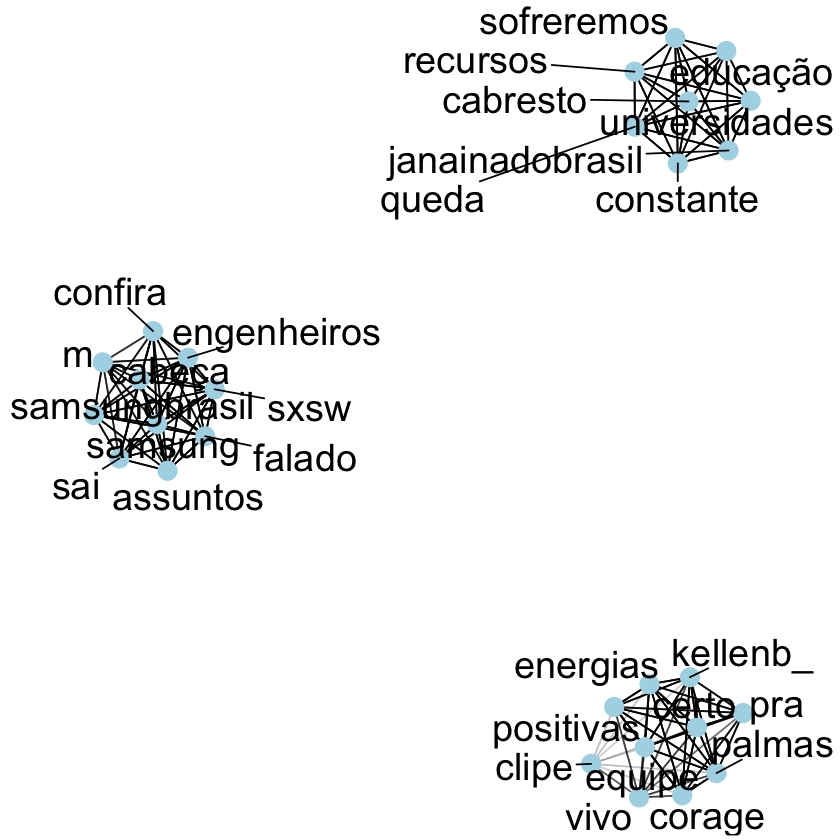

In [34]:
correlacao %>%
    filter(correlation > .80) %>%
    graph_from_data_frame() %>%
    ggraph(layout = 'fr') + 
    geom_edge_link(aes(edge_alpha = correlation), show.legend = FALSE) + 
    geom_node_point(color = 'lightblue', size = 5) + 
    geom_node_text(aes(label = name), repel = TRUE,position = position_dodge(width=0.9),  size=8) + 
    theme_void()